In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import joblib
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [2]:
# previous semistor: 535 instances, 21 features

df = pd.read_csv("../data_set_535_ano_sankee.csv")

print(df.shape)

X = df.drop('price', axis = 1)
y = df['price']

lr = linear_model.LinearRegression()
rf = RandomForestRegressor()

scores_l = cross_val_score(lr, X, y, cv=3, scoring = 'r2')
scores_r = cross_val_score(rf, X, y, cv=3, scoring = 'r2')
print('lr', np.mean(scores_l))
print('rf', np.mean(scores_r))

(535, 21)
lr 0.03585991005773603
rf 0.41239416560362524


In [3]:
# previous semistor: 535 instances, 6 features

df = pd.read_csv("../data_set_535_ano_sankee.csv")

print(df.shape)

X = df.drop('price', axis = 1)
y = df['price']

lr = linear_model.LinearRegression()
rf = RandomForestRegressor()

scores_l = cross_val_score(lr, X, y, cv=3, scoring = 'r2')
scores_r = cross_val_score(rf, X, y, cv=3, scoring = 'r2')
print('lr', np.mean(scores_l))
print('rf', np.mean(scores_r))

(535, 21)
lr 0.03585991005773603
rf 0.4088152635055639


In [4]:
# instances: 7577, features: 6
df = pd.read_csv("../house_data_set_cleaned_3.csv")

print(df.shape)

X = df.drop('price', axis = 1)
y = df['price']

lr = linear_model.LinearRegression()
rf = RandomForestRegressor()

scores_l = cross_val_score(lr, X, y, cv=10, scoring = 'r2')
scores_r = cross_val_score(rf, X, y, cv=10, scoring = 'r2')
print('lr', np.mean(scores_l))
print('rf', np.mean(scores_r))

(7577, 6)
lr 0.4085045159117596
rf 0.7032503115727032


In [5]:
# One hot encoding
# instances: 7577, features: 6

df = pd.read_csv("../house_data_set_cleaned_3.csv")
    
dummies = pd.get_dummies(df.location)
merged = pd.concat([df, dummies], axis='columns')
df = merged.drop(['location', 39], axis='columns')

df.to_csv("../house_data_colombo.csv", index = False)

df = pd.read_csv("../house_data_colombo.csv")
print(df.shape)

X = df.drop("price", axis = 1)
y = df.price

lr = linear_model.LinearRegression()
rf = RandomForestRegressor()

scores_l = cross_val_score(lr, X, y, cv=10, scoring = 'r2')
scores_r = cross_val_score(rf, X, y, cv=10, scoring = 'r2')
print('lr', np.mean(scores_l))
print('rf', np.mean(scores_r))

(7577, 44)
lr 0.6061521742823847
rf 0.6983107498852015


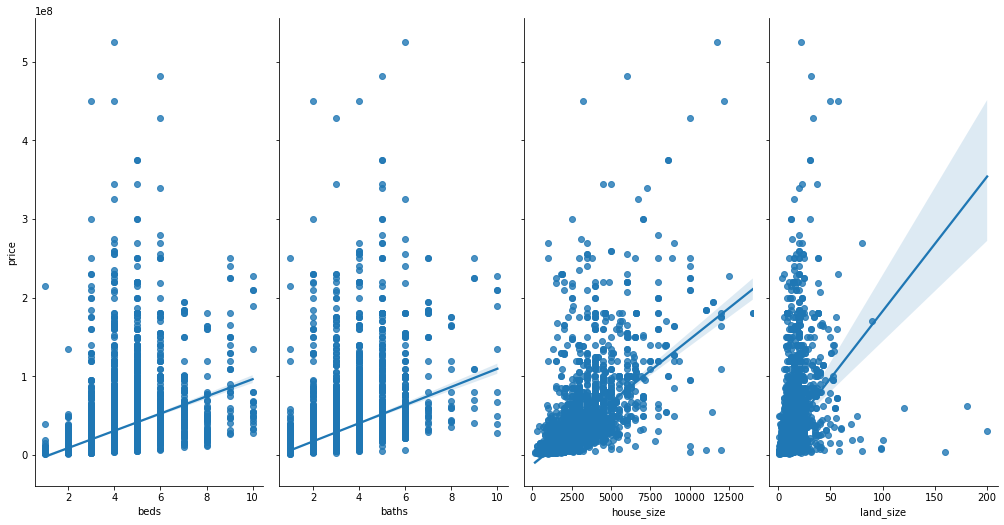

In [6]:
sns.pairplot(df, x_vars=['beds', 'baths', 'house_size', 'land_size'], y_vars='price', height=7, aspect=0.5, kind='reg')

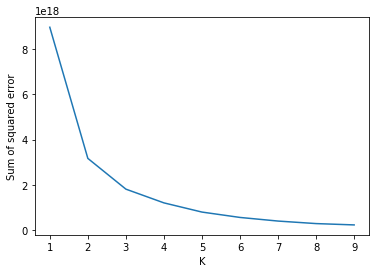

In [7]:
# Elbow method
# Finding k value

import matplotlib.pyplot as plt
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [8]:
# Removing outliers by clustering

df = pd.read_csv("../house_data_colombo.csv")

km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df)
df['cluster'] = y_predicted
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

print('cluster1', df1.shape)
print('cluster2', df2.shape)
print('cluster3', df3.shape)

lr = linear_model.LinearRegression()
rf = RandomForestRegressor()

X1 = df1.drop('price', axis = 1).drop('cluster', axis = 1)
y1 = df1['price']

X2 = df2.drop('price', axis = 1).drop('cluster', axis = 1)
y2 = df2['price']

X3 = df3.drop('price', axis = 1).drop('cluster', axis = 1)
y3 = df3['price']

df1_rc = df1.drop('cluster', axis = 1)
df1_rc.to_csv('../house_data_colombo_cluster1.csv', index = False)


scores_cluster1_l = cross_val_score(lr, X1, y1, cv=10)
scores_cluster2_l = cross_val_score(lr, X2, y2, cv = 10)
scores_cluster3_l = cross_val_score(lr, X3, y3, cv = 10)

print('cluster1_l:', np.mean(scores_cluster1_l))
print('cluster2_l:', np.mean(scores_cluster2_l))
print('cluster3_l:', np.mean(scores_cluster3_l))

cluster1 (6813, 45)
cluster2 (158, 45)
cluster3 (606, 45)
cluster1_l: 0.6918110913798157
cluster2_l: -0.3299842240641212
cluster3_l: 0.16032867968325953
